# Paired t test #

# Document

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Paired t test</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2022-11-21</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2017-08-06</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">Paired t test.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">data_paired_t.csv</td>
    </tr>
</table>

# In brevi #

The paired t test (Snedecor and Cochran 1989) is used to determine if the average differences of paired data are different.

“Paired” means that there is a one-to-one correspondence between the values in two samples. If $x_1, x_2, ..., x_n$ and $y_1, y_2, ..., Y_n$ are two samples, then $x_i$ corresponds to $y_i$. 

**Example**. A sample of a product is taken from a process. Measurements are made of the “before” condition. The products are potentially changed in some way, such as a cleaning step. The “before” and “after” measurements of a characteristic are made with the same device, on the same $n$ units. Each “before” measurement is paired with the corresponding “after” measurement and the differences are calculated.

A paired t test can be used for:

1. Is the average of the differences not equal to zero?
2. Is the average of the differences greater than zero?
3. Is the average of the differences less than zero?
4. Is the average of the differences not equal to some hypothesized average?
5. Is the average of the differences greater than some hypothesized average?
6. Is the average of the differences less than some hypothesized average?

# Contents #

- [Assumptions](#assumptions)
- [How to use this notebook](#how-to-use-this-notebook)
- [Quick-and-dirty](#quick-and-dirty)
- [Graphical analysis](#graphical-analysis)
- [Descriptive statistics](#descriptive-statistics)
- [Hypothesis test method](#hypothesis-test-method)
- [Confidence interval test method](#confidence-interval-test-method)
- [Python librairies](#python-librairies)
- [References](#references)
- [Support](#support)

# Assumptions #

For t tests in general:

- The data in a sample follow a normal distribution mean $\mu$ and variance $\sigma^2$.
- The sample variance $s^2$ follows a $\chi^2$ distribution with $\rho$ degrees of freedom under the null hypothesis, where $\rho$ is a positive constant.
- $(\overline{Y} - \mu)$ and the sample standard deviations $s$ are independent.

For the paired t test:

**edit**. Are there any assumptions?

# How to use this notebook #

1. Edit the test parameters.
2. Create a data file.
3. Recalculate all “In” cells.

## Edit the test parameters ##

Change the following parameter to suit your analysis:

- signficance_level
- hypothesized_difference

In [1]:
from IPython.display import display_html
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import math

In [2]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
hypothesized_difference = 4
significance_level = 0.05

## Create a data file ##

- Name the columns of your data with the labels **before**, **after**, and **differences**.
- Save it as CSV (comma-separated values) with the name **data_paired_t.csv**.
- Put it in the same directory as this notebook.

**Edits**. Remove the "difference" column in the csv file. There should be only two columns. Add code to calculate the differences in the notebook.

In [4]:
# A csv data file should be utf-8 encoded.
# If so, it does not require a utf-8 declaration.
# df = pd.read_csv('datafile_filename.csv', encoding='utf-16')
# for a utf-16 encoded file.
# the before measurements are in a “before” column
# the after measurements are in an “after” column
# the differences of “after” - “before” are in a “difference” column
df = pd.read_csv('data_paired_t.csv')
df

,before,after
0,68,67
1,76,77
2,74,74
3,71,74
4,71,69
5,72,70
6,75,71
7,83,77
8,75,71
9,74,74


In [5]:
df_before_after = df[['before', 'after']]
df_before_after

,before,after
0,68,67
1,76,77
2,74,74
3,71,74
4,71,69
5,72,70
6,75,71
7,83,77
8,75,71
9,74,74


In [6]:
print(*(df['after'] - df['before']), sep=', ')

-1, 1, 0, 3, -2, -2, -4, -6, -4, 0, -3, -9, -7, -3, 2, -4, -3, 4, -3, -3


In [7]:
difference_calc = df['after'] - df['before']
difference_calc

0    -1
1     1
2     0
3     3
4    -2
5    -2
6    -4
7    -6
8    -4
9     0
10   -3
11   -9
12   -7
13   -3
14    2
15   -4
16   -3
17    4
18   -3
19   -3
dtype: int64

## Recalculate

- Click on “Kernel”.
- Click on “Restart & Run All”.

# Quick-and-dirty #

Here is the minimal code to do the test.

In [8]:
scipyresult = stats.ttest_rel(df['before'], df['after'])

if scipyresult.pvalue < significance_level:
    print('Statistically significant. The test statistic =',
          scipyresult.statistic.round(3),
          '. The p value = ', scipyresult.pvalue.round(3)), '.'
else:
    print('Not statistically significant. The test statistic =',
          scipyresult.statistic.round(3),
          '. The p value = ', scipyresult.pvalue.round(3)), '.'

Statistically significant. The test statistic = 3.023 . The p value =  0.007



**Editor note**. The above code is for a null hypothesis that the difference is zero and the alternative hypothesis is not zero. Can I do the other scenarios in a quick-and-dirty manner?

# Graphical analyses #

## Histogram ##

array([[<AxesSubplot: title={'center': 'after'}>]], dtype=object)

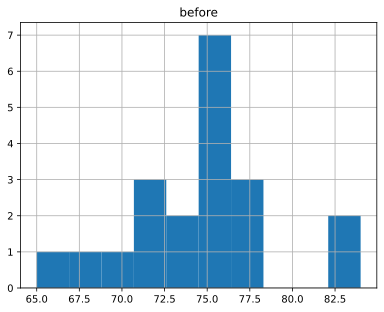

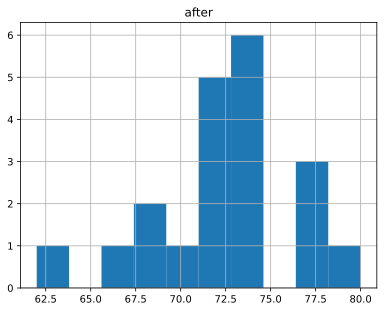

In [9]:
# http://matplotlib.org/api/pyplot_api.html
df[['before']].hist()
df[['after']].hist()

array([[<AxesSubplot: title={'center': 'before'}>,
        <AxesSubplot: title={'center': 'after'}>]], dtype=object)

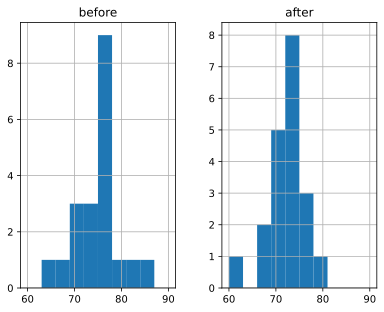

In [10]:
# Using the results of the above histograms,edit the values in the
# “range” in order to plot the two side-by-side with the same spread.
df_before_after.hist(range=(60, 90))

### Box plot ###

<AxesSubplot: >

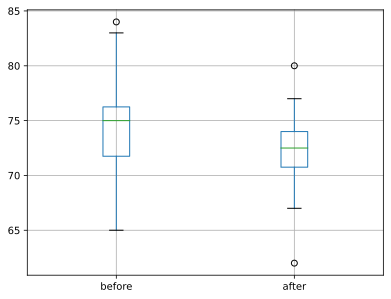

In [11]:
# return_type='axes' to stop it from printing a note about a future
# API change
df_before_after.boxplot(return_type='axes')

In [12]:
difference_calc.describe()

count    20.000000
mean     -2.200000
std       3.254147
min      -9.000000
25%      -4.000000
50%      -3.000000
75%       0.000000
max       4.000000
dtype: float64

## Normal probability plot ###

((array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
         -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
          0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
          0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ]),
  array([-9, -7, -6, -4, -4, -4, -3, -3, -3, -3, -3, -2, -2, -1,  0,  0,  1,
          2,  3,  4])),
 (3.3755844285874477, -2.2000000000000006, 0.9846284165646858))

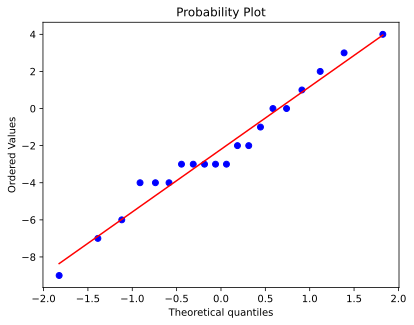

In [13]:
stats.probplot(difference_calc, dist=stats.norm, plot=plt)

# Descriptive statistics #

**edit**. Use the "one-sample t test" notebook to guide me for this section.

## Lack-of-fit tests ##

**edit**. Use the "one-sample t test" notebook to guide me for this section.

# Hypothesis test method #


The paired-sample t test is used to determine whether the average of the differences between two paired samples differs from zero or some hypothesized value.

Calculate:

$$
\begin{aligned}
    \overline{d} & = \frac{1}{n} \sum\limits_{i=1}^{n} d_i \\
    s_d          & = \sqrt{\frac{1}{n-1} \sum\limits_{i=1}^{n} \left(d_i-
                     \overline{d}\right)^2} \\
    t_\text{calculated} & = \frac{\overline{d}}{s_d \text{ } / {\sqrt{n}}} \\
    t_\text{critical} & = t_{1- \alpha / 2 \text{, } \nu} \text{ or } 
                          t_{1- \alpha \text{, } \nu} \\
\end{aligned}
$$

where:

$$
\begin{align*}
    \overline{d}        & = \text{the average of the differences} \\
    n                   & = \text{the number of observations in the sample} \\
    d_i                 & = \text{the difference between paired units} \\
    s_d                 & = \text{the standard deviation of the differences} \\
    t_\text{calculated} & = \text{the test statistic} \\
    t_\text{critical}   & = \text{the $100(1-\alpha/2)$ or $100(1-\alpha)$ percentile of 
                           the t distribution} \\
    \alpha              & = \text{the significance level} \\
    \nu                 & = \text{the degrees of freedom} = n - 1 \\
\end{align*}
$$

There are two possible scenarios for H<sub>o</sub>:

1. H<sub>o</sub>: $\mu_d = 0$. The population mean of the differences ($\mu_d$) equals zero.
2. H<sub>o</sub>: $\mu_d = d$. The population mean of the differences ($\mu_d$) equals some hypothesized value.

The critical value is defined as:

Reject H<sub>o</sub> if:

$$
\begin{aligned}
    |t_\text{calculated}| & ≥ t_{1-\alpha/2\text{, }\nu} \\
    |t_\text{calculated}| & ≤ t_{1-\alpha\text{, }\nu} \\
    |t_\text{calculated}| & ≥ t_{1-\alpha\text{, }\nu} \\
\end{aligned}
$$

There are six possible scenarios for H<sub>a</sub>:

1. H<sub>a</sub>: $\mu_d ≠ 0$. The population average of the differences ($\mu_d$) does not equal zero.
2. H<sub>a</sub>: $\mu_d < 0$. The population average of the differences ($\mu_d$) is less than zero.
3. H<sub>a</sub>: $\mu_d > 0$. The population average of the differences ($\mu_d$) is greater than zero.
4. H<sub>a</sub>: $\mu_d ≠ d$. The population average of the differences ($\mu_d$) does not equal zero.
5. Hv<sub>a</sub> $\mu_d < d$. The population average of the differences ($\mu_d$) is less than some hypothesized value.
6. H<sub>a</sub>: $\mu_d > d$. The population average of the differences ($\mu_d$) is greater than some hypothesized value.

In [14]:
degrees_freedom = len(difference_calc) - 1
degrees_freedom

19

In [15]:
t_critical_two_tail = stats.t.isf(significance_level / 2,
                                  degrees_freedom)
t_critical_two_tail

2.0930240544082634

In [16]:
t_critical_one_tail = stats.t.isf(significance_level,
                                  degrees_freedom)

t_critical_one_tail

1.7291328115213678


## H<sub>a</sub>: $\mu_d ≠ 0$  Scenario 1 ##

Calculate:

$$
\begin{aligned}
    \overline{d} & = \frac{1}{n} \sum\limits_{i=1}^{n} d_i \\
    s_d          & = \sqrt{\frac{1}{n-1} \sum\limits_{i=1}^{n} \left(d_i-
                     \overline{d}\right)^2} \\
    t_\text{calculated} & = \frac{\overline{d}}{s_d \text{ } / {\sqrt{n}}} \\
    t_\text{critical} & = t_{1- \alpha / 2 \text{, } \nu} \text{ or } 
                          t_{1- \alpha \text{, } \nu} \\
\end{aligned}
$$

H_o: $\mu_d = 0$. The pupulation average of the differences ($\mu_d$) equals zero.<br />
H_a: $\mu_d ≠ 0$. The pupulation average of the differences ($\mu_d$) does not equal zero.<br />
Reject H<sub>o</sub> if $|t_\text{calculated}| ≥ t_{1-\alpha/2\text{, }\nu}$

In [17]:
d_average = difference_calc.mean()
d_standard_deviation = difference_calc.std()
t_calculated_case_1 = d_average * math.sqrt(len(difference_calc)) / \
                      d_standard_deviation
p_value_case_1 = stats.t.sf(math.fabs(t_calculated_case_1),
                            degrees_freedom) * 2

In [18]:
display_html('H<sub>o</sub>: average of the paired differences = 0' +
             '<br />' +
             'H<sub>a</sub>: average of the paired differences ≠ 0' +
             '<br />' +
             'Average of the paired differences = ' +
             str(d_average.round(3)) + '<br />' +
             'Standard deviation of the paired differences = ' +
             str(d_standard_deviation.round(3)) + '<br />' +
             't<sub>calculated</sub> = ' + str(t_calculated_case_1.
                                               round(3)) + '<br />' +
             't<sub>critical</sub> = ' + str(t_critical_two_tail.
                                             round(3)) + '<br />' +
             'p value for t<sub>calculated</sub> = ' +
             str(p_value_case_1.round(3)),
             raw=True)
if abs(t_calculated_case_1) > t_critical_two_tail:
    display_html('The average of the paired differences is ' +
                 'statistically, significantly different from 0 ' +
                 'because | t<sub>calculated</sub> | ' +
                 '> t<sub>critical</sub> .', raw=True)
else:
    display_html('The average of the paired differences is not ' +
                 'statistically, significantly different from 0 ' +
                 'because | t<sub>calculated</sub> | ' +
                 '< t<sub>critical</sub> .', raw=True)

H o : average of the paired differences = 0 H a : average of the paired differences ≠ 0 Average of the paired differences = -2.2 Standard deviation of the paired differences = 3.254 t calculated = -3.023 t critical = 2.093 p value for t calculated = 0.007

The average of the paired differences is statistically, significantly different from 0 because | t calculated | > t critical .

## H<sub>a</sub>: $\mu_d < 0$ Scenario 2 ##

Calculate:

$$
\begin{aligned}
    \overline{d} & = \frac{1}{n} \sum\limits_{i=1}^{n} d_i \\
    s_d          & = \sqrt{\frac{1}{n-1} \sum\limits_{i=1}^{n} \left(d_i-
                     \overline{d}\right)^2} \\
    t_\text{calculated} & = \frac{\overline{d}}{s_d \text{ } / {\sqrt{n}}} \\
    t_\text{critical} & = t_{1- \alpha \text{, } \nu} \\
\end{aligned}
$$

H_o: $\mu_d = 0$. The pupulation average of the differences ($\mu_d$) equals zero.<br />
H_a: $\mu_d < 0$. The pupulation average of the differences ($\mu_d$) is less than zero.<br />
Reject H<sub>o</sub> if $|t_\text{calculated}| ≤ t_{1-\alpha\text{, }\nu}$

In [19]:
t_calculated_case_2 = d_average * math.sqrt(len(difference_calc)) / d_standard_deviation
p_value_case_2 = 1 - stats.t.sf(math.fabs(t_calculated_case_2), degrees_freedom)

In [20]:
display_html('H<sub>o</sub>: average of the paired differences = 0' +
             '<br />' +
             'H<sub>a</sub>: average of the paired differences < 0' +
             '<br />' +
             'Average of the paired differences = ' +
             str(d_average.round(3)) + '<br />' +
             'Standard deviation of the paired differences = ' +
             str(d_standard_deviation.round(3)) + '<br />' +
             't<sub>calculated</sub> = ' +
             str(t_calculated_case_2.round(3)) + '<br />' +
             't<sub>critical</sub> = ' +
             str(t_critical_one_tail.round(3)) + '<br />' +
             'p value for t<sub>calculated</sub> = ' +
             str(p_value_case_2.round(3))
             , raw=True)
if abs(t_calculated_case_2) < t_critical_one_tail:
    display_html('The average of the paired differences is ' +
                 'statistically, significantly less than 0 ' +
                 'because | t<sub>calculated</sub> | ' +
                 '< t<sub>critical</sub> .', raw=True)
else:
    display_html('The average of the paired differences is not ' +
                 'statistically, significantly less than 0 ' +
                 'because | t<sub>calculated</sub> | ' +
                 '≥ t<sub>critical</sub> .', raw=True)

H o : average of the paired differences = 0 H a : average of the paired differences < 0 Average of the paired differences = -2.2 Standard deviation of the paired differences = 3.254 t calculated = -3.023 t critical = 1.729 p value for t calculated = 0.997

The average of the paired differences is not statistically, significantly less than 0 because | t calculated | ≥ t critical .

## H<sub>a</sub>: $\mu_d > 0$ Scenario 3 ##

Calculate:

$$
\begin{aligned}
    \overline{d} & = \frac{1}{n} \sum\limits_{i=1}^{n} d_i \\
    s_d          & = \sqrt{\frac{1}{n-1} \sum\limits_{i=1}^{n} \left(d_i-
                     \overline{d}\right)^2} \\
    t_\text{calculated} & = \frac{\overline{d}}{s_d \text{ } / {\sqrt{n}}} \\
    t_\text{critical} & = t_{1- \alpha \text{, } \nu} \\
\end{aligned}
$$

H_o: $\mu_d = 0$. The pupulation average of the differences ($\mu_d$) equals zero.<br />
H_a: $\mu_d > 0$. The pupulation average of the differences ($\mu_d$) is less than zero.<br />
Reject H<sub>o</sub> if $|t_\text{calculated}| ≥ t_{1-\alpha\text{, }\nu}$

In [21]:
t_calculated_case_3 = d_average * math.sqrt(len(difference_calc)) / \
                      d_standard_deviation
t_calculated_case_3

-3.0234339882840073

In [22]:
p_value_case_3 = stats.t.sf(math.fabs(t_calculated_case_2),
                            degrees_freedom)
p_value_case_3

0.0034945969117464873

In [23]:
display_html('H<sub>o</sub>: average of the paired differences = 0' +
             '<br />' +
             'H<sub>a</sub>: average of the paired differences ≠ 0' +
             '<br />' +
             'Average of the paired differences = ' +
             str(d_average.round(3)) + '<br />' +
             'Standard deviation of the paired differences = ' +
             str(d_average.round(3)) + '<br />' +
             't<sub>calculated</sub> = ' +
             str(t_calculated_case_2.round(3)) + '<br />' +
             't<sub>critical</sub> = ' +
             str(t_critical_one_tail.round(3)) + '<br />' +
             'p value for t<sub>calculated</sub> = ' +
             str(p_value_case_2.round(3))
             , raw=True)
if abs(t_calculated_case_2) < t_critical_one_tail:
    display_html('The average of the paired differences is ' +
                 'statistically, significantly less than 0 ' +
                 'because | t<sub>calculated</sub> | ' +
                 '< t<sub>critical</sub> .', raw=True)
else:
    display_html('The average of the paired differences is not ' +
                 'statistically, significantly less than 0 ' +
                 'because | t<sub>calculated</sub> | ' +
                 '≥ t<sub>critical</sub> .', raw=True)

H o : average of the paired differences = 0 H a : average of the paired differences ≠ 0 Average of the paired differences = -2.2 Standard deviation of the paired differences = -2.2 t calculated = -3.023 t critical = 1.729 p value for t calculated = 0.997

The average of the paired differences is not statistically, significantly less than 0 because | t calculated | ≥ t critical .

## H<sub>a</sub>: $\mu_d = d$ Scenario 4 ##

## H<sub>a</sub>: $\mu_d < d$ Scenario 5 ##

## H<sub>a</sub>: $\mu_d > d$ Scenario 6 ##

# Confidence interval method #

The paired-sample t test is used to calculate a range of values that is likely to include the population average of the differences.

**Edits**. This section needs to be fixed. It is currently written for a two-sample t.

For a given confidence interval of an average of a sample, if many samples are collected and the confidence interval is calculated for each sample, in the long run about 95 % of these intervals would contain the true average.

The two-sample t test (Snedecor and Cochran 1989) is used to determine if the difference between the averages of two samples is not equal to zero.

The hypotheses are:

H<sub>o</sub>: |$\overline{y}_1$ - $\overline{y}_2$| = 0<br />
H<sub>a</sub>: |$\overline{y}_1$ - $\overline{y}_2$| ≠ 0

## Variances are assumed to be equal  ##

### n<sub>1</sub> < 30 or n<sub>2</sub> < 30 ###

The confidence limits are defined as:

$$
\begin{aligned}
    (\overline{y}_1 - \overline{y}_2) \pm t_{1- \alpha / 2 \, \text{,} \, \nu} \times
        s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} \\
\end{aligned}
$$

where:

$$
\begin{align*}
    s_p & = \text{the pooled standard deviation} \\
        & = \sqrt{\frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2}{n_1 + n_2 - 2}} \\
    n_1                & = \text{the number of observations in sample 1} \\
    n_2                & = \text{the number of observations in sample 2} \\
    \overline{y}_1     & = \text{the average of sample 1} \\
    \overline{y}_2     & = \text{the average of sample 2} \\
    s^2_1              & = \text{the variance of sample 1} \\
    s^2_2              & = \text{the variance of sample 2} \\
    t_{1- \alpha / 2 \, \text{,} \, n-1} & = \text{the $100(1-\alpha/2)$ percentile of the t distribution with $n-1$ degrees of freedom} \\
    \nu                         & = n_1 + n_2 - 2 \\
    \alpha                      & = \text{the desired significance level}
\end{align*}
$$

Reject H<sub>o</sub> if 0 is not within the confidence interval.

In [24]:
n_one = len(df['before'])
n_two = len(df['after'])
average_one = np.mean(df['before'])
average_two = np.mean(df['after'])
delta_one_two = average_one - average_two
variance_one = np.var(df['before'], ddof=1)
standard_deviation_one = np.std(df['before'], ddof=1)
variance_two = np.var(df['after'], ddof=1)
standard_deviation_two = np.std(df['after'], ddof=1)
va = variance_one / n_one
vb = variance_two / n_two
vc = n_one + n_two - 2
ve = math.sqrt(1 / n_one + 1 / n_two)
t_critical_equal = stats.t.isf(significance_level / 2, vc)
standard_deviation_pooled = math.sqrt(((n_one - 1) * variance_one
                                     + (n_two - 1) *
                                     variance_two) / vc)

In [25]:
lower_limit = delta_one_two - t_critical_equal * \
              standard_deviation_pooled * ve
upper_limit = delta_one_two + t_critical_equal * \
              standard_deviation_pooled * ve
if 0 < lower_limit or 0 > upper_limit:
    display_html('The two averages are statistically, significantly '
                 'different because 0 is not contained within the '
                 'confidence interval '
                 '(' + str(lower_limit.round(3)) + ', ' +
                 str(upper_limit.round(3)) + ')'
                 ' of the difference ' + str(delta_one_two.round(3)) +
                 '.', raw=True)
else:
    display_html('The two averages are not statistically, significantly '
                 'different because 0 is contained within the '
                 'confidence interval '
                 '(' + str(lower_limit.round(3)) + ', ' +
                 str(upper_limit.round(3)) + ')'
                 ' of the difference ' + str(delta_one_two.round(3)) +
                 '.', raw=True)

The two averages are not statistically, significantly different because 0 is contained within the confidence interval (-0.546, 4.946) of the difference 2.2.

## Variances are assumed to be unequal ##

**edit**. Is there such a scenario? What does Minitab do?

# References #

- [Snedecor, George W., and William G. Cochran. 1989. *Statistical Methods*. Eighth Edition. Iowa State University Press](http://www.amazon.com/Statistical-Methods-George-W-Snedecor/dp/0813815614)
- [Minitab. “Resting heart rate data”.](http://support.minitab.com/en-us/datasets/basic-statistics-data-sets/resting-heart-rate-data/)
- [NIST. Engineering Statistics Handbook.“7.3.1.1. Analysis of paired observations.”](http://www.itl.nist.gov/div898/handbook/prc/section3/prc311.htm)
- [Wikipedia. “Confidence interval.”](https://en.wikipedia.org/wiki/Confidence_interval)
- [Wikipedia. “Two-sample t-test”](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test)
- [Wikipedia. “Normal probability plot.”](https://en.wikipedia.org/wiki/Normal_probability_plot)

# Support #

## Enhancements ##

- Code to check the assumptions.
- Six examples to develop above:
    1. average of the differences ≠ 0
    2. average of the differences > 0
    3. average of the differences < 0
    4. averages of the differences ≠ a specified difference
    5. averages of the differences > a specified difference
    6. averages of the differences < a specified difference

## Data sets ##

These data sets were used to test this notebook. They can also be used as examples for further study.

- [Minitab. “Resting heart rate data”.](http://support.minitab.com/en-us/datasets/basic-statistics-data-sets/resting-heart-rate-data/)

## Python librairies ##

- [matplotlib](https://github.com/matplotlib/matplotlib)
- [numpy](https://github.com/numpy/numpy)
- [pandas](https://github.com/pydata/pandas)
- [scipy](https://github.com/scipy/scipy)
- [statsmodels.stats](http://statsmodels.sourceforge.net/stable/generated/statsmodels.stats.weightstats.ttost_paired.html?highlight=paired%20t#statsmodels.stats.weightstats.ttost_paired)